In [1]:
import scipy.signal as spsig
import pytry
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame(pytry.read('Training_500x3'))
keys_goal_test = [k for k in data.keys() for v in data[k] if k.startswith('output_goal_test')]
keys_noplay_test = [k for k in data.keys() for v in data[k] if k.startswith('output_noplay_test')]
keys_aimless = [k for k in data.keys() for v in data[k] if k.startswith('output_aimless')]
keys_training = ['output_goal_train', 'output_noplay_train']
data2={}
for j in range(20):
    for k in keys_goal_test:
        a=data[k][j]['output']
        data2[k]=pd.Series([a])
    for k in keys_noplay_test:
        a=data[k][j]['output']
        data2[k]=pd.Series([a])
    for k in keys_aimless:
        a=data[k][j]['output']
        data2[k]=pd.Series([a])
    for k in keys_training:
        a=data[k][j+20]['output']
        data2[k]=pd.Series([a])
    if j==0:
        data2=pd.DataFrame(data2)
        data3=data2
    else:
        data2=pd.DataFrame(data2)
        data3=data3.append(data2, ignore_index=True)
data3

,output_goal_test000,output_goal_test001,output_goal_test002,output_goal_test003,output_goal_test004,output_goal_test005,output_goal_test006,output_goal_test007,output_goal_test008,output_goal_test009,...,output_aimless042,output_aimless043,output_aimless044,output_aimless045,output_aimless046,output_aimless047,output_aimless048,output_aimless049,output_goal_train,output_noplay_train
0,"[[-0.06560444336744436], [0.017997909396935463...","[[-0.01431582060487152], [0.10531792529004119]...","[[-0.15412835617691195], [-0.1893087940884176]...","[[-0.07115999680268009], [-0.03499333115621828...","[[-0.11298578937817583], [-0.10901837048931678...","[[-0.22548287339883405], [-0.30038538299094086...","[[-0.1065974894857174], [-0.07785248035194381]...","[[-0.10648790110135398], [-0.10079421010633643...","[[-0.11151107056838505], [-0.10060775968254237...","[[-0.09903933358893141], [-0.02621213402411842...",...,"[[-0.1139442906996489], [-0.00955196650731227]...","[[-0.1621862602975278], [-0.18564482082046435]...","[[-0.19921491697441668], [-0.2620187334239404]...","[[-0.15571103803614228], [-0.16551399166054614...","[[-0.18569394574994758], [-0.18472185695207283...","[[-0.08704069746093557], [-0.06913840491557127...","[[-0.12771107652271985], [-0.11272170812366739...","[[-0.22989676524406838], [-0.2835485861814312]...","[[-0.11286275839399651], [-0.02161295836306892...","[[0.13804621160573816], [0.009746590898221053]..."
1,"[[-0.06560444336744436], [0.017997909396935463...","[[-0.01431582060487152], [0.10531792529004119]...","[[-0.15412835617691195], [-0.1893087940884176]...","[[-0.07115999680268009], [-0.03499333115621828...","[[-0.11298578937817583], [-0.10901837048931678...","[[-0.22548287339883405], [-0.30038538299094086...","[[-0.1065974894857174], [-0.07785248035194381]...","[[-0.10648790110135398], [-0.10079421010633643...","[[-0.11151107056838505], [-0.10060775968254237...","[[-0.09903933358893141], [-0.02621213402411842...",...,"[[-0.1139442906996489], [-0.00955196650731227]...","[[-0.1621862602975278], [-0.18564482082046435]...","[[-0.19921491697441668], [-0.2620187334239404]...","[[-0.15571103803614228], [-0.16551399166054614...","[[-0.18569394574994758], [-0.18472185695207283...","[[-0.08704069746093557], [-0.06913840491557127...","[[-0.12771107652271985], [-0.11272170812366739...","[[-0.22989676524406838], [-0.2835485861814312]...","[[-0.11286275839399651], [-0.02161295836306892...","[[0.13804621160573816], [0.009746590898221053]..."
2,"[[0.01856954236304037], [-0.050049030140014494...","[[-0.041693652811509996], [-0.1434812043047640...","[[0.07847908726668373], [0.10296499105942444],...","[[0.07475991038846419], [0.10164998673194492],...","[[0.10891133353751992], [0.14027913412041615],...","[[-0.051968690966520514], [-0.1547766260361871...","[[0.03164388625783032], [0.014581862393375278]...","[[-0.044847500036523935], [-0.299748576416204]...","[[0.04196561889040118], [0.01686365365325493],...","[[0.036675249026517975], [0.027433181285573704...",...,"[[0.005802683611345061], [-0.03580044352253131...","[[-0.009546908525649711], [-0.0855255221423621...","[[-0.13524966302421054], [-0.3439817872735592]...","[[0.002593127948334051], [-0.18710053936906756...","[[0.04094293541765315], [0.024496892969515516]...","[[-0.08004651134896262], [-0.19939497746926108...","[[0.020446566225712448], [-0.00559366622984719...","[[0.04951390727011157], [0.06256434191849236],...","[[0.0831200254469176], [0.10600908509745965], ...","[[0.09105563990897628], [0.03054247268522159],..."
3,"[[0.2678091263893414], [0.2494207990021718], [...","[[0.2661267610565739], [0.23251482200960585], ...","[[0.2225974143295095], [0.1299281381998847], [...","[[0.2644989927425001], [0.23115005865269514], ...","[[0.28163031260189547], [0.27321261615594755],...","[[0.3067096035474035], [0.3053072363768262], [...","[[0.26466671757616955], [0.22043813703681878],...","[[0.26945900416014695], [0.2628116110912644], ...","[[0.25720196488743075], [0.22126225007775868],...","[[0.

In [3]:
keys = [k for k in data3.keys() for v in data3[k]]
values = [v for k in data3.keys() for v in data3[k]]
data3 = pd.DataFrame.from_dict({'pattern':keys, 'output': values})
data3=data3.set_index('pattern')

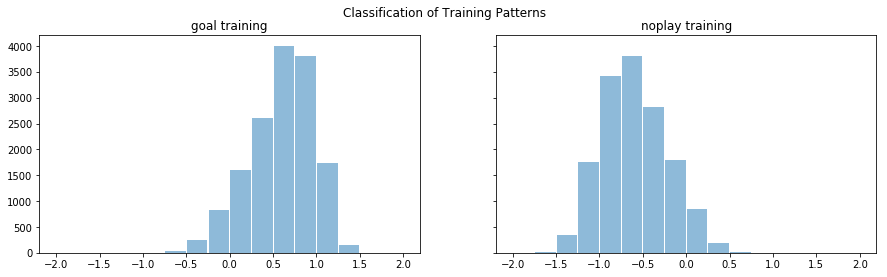

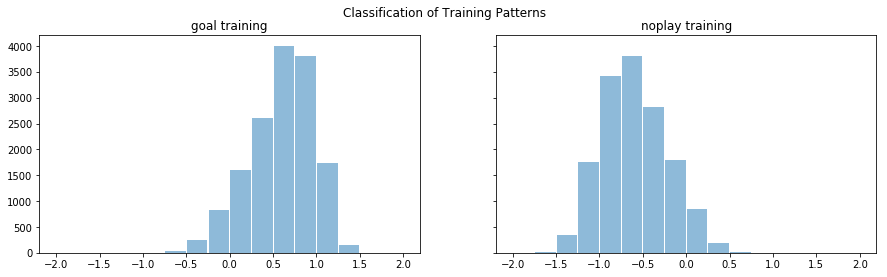

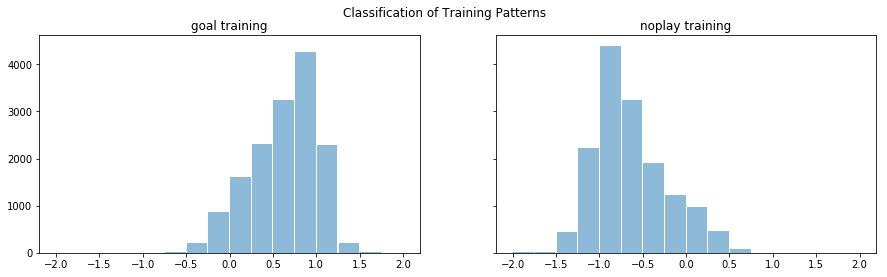

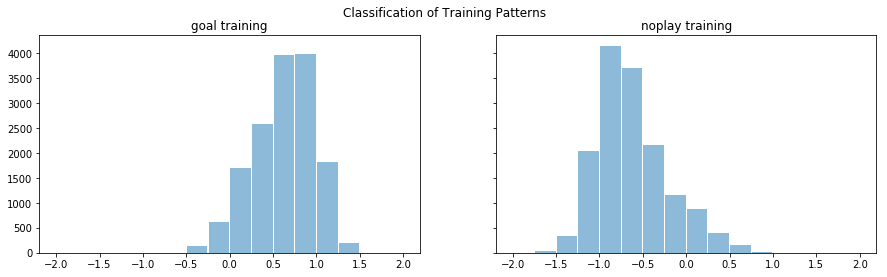

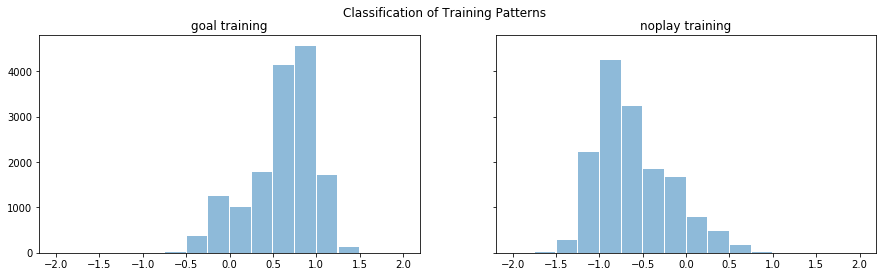

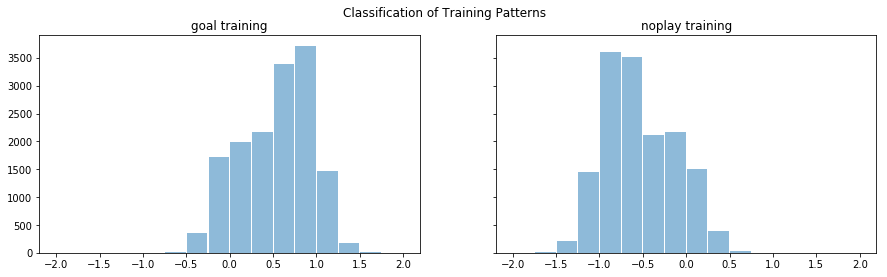

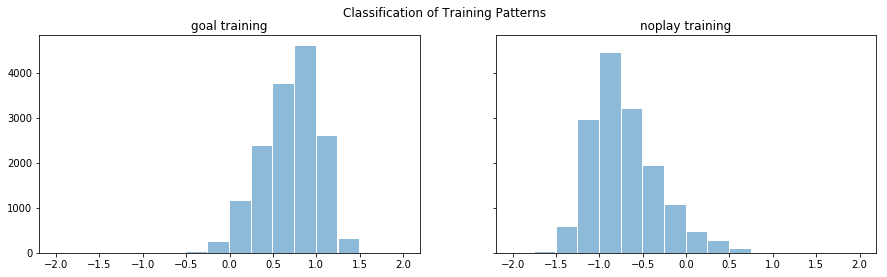

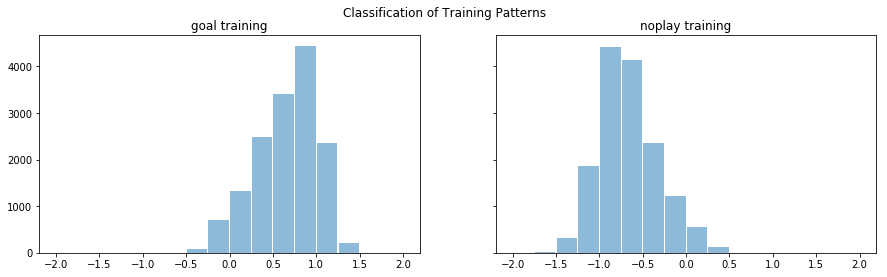

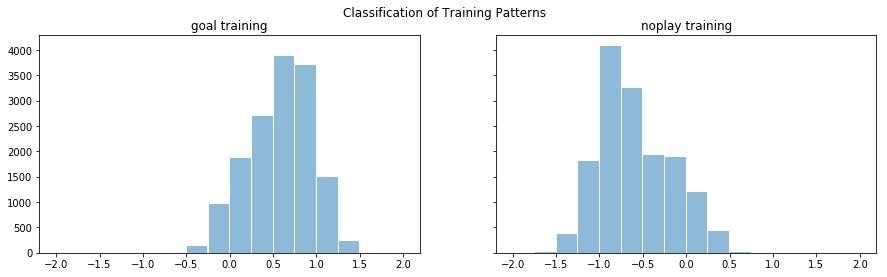

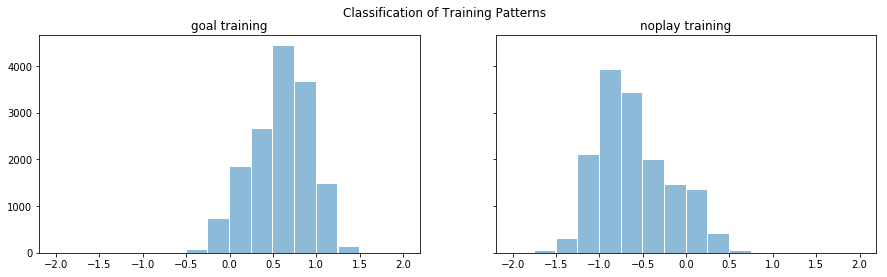

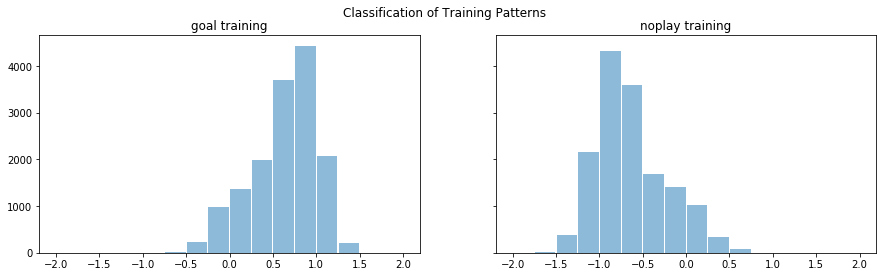

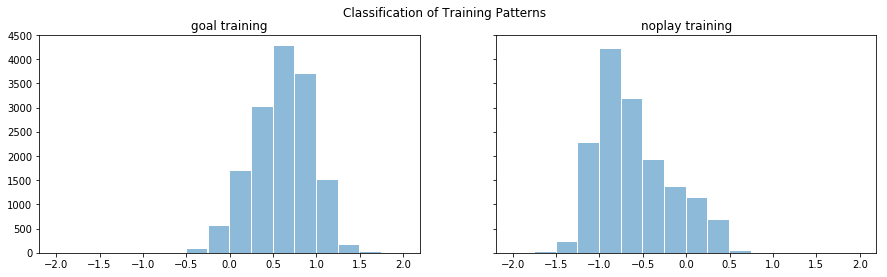

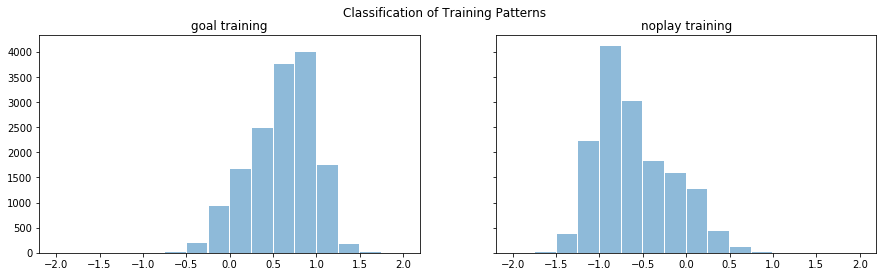

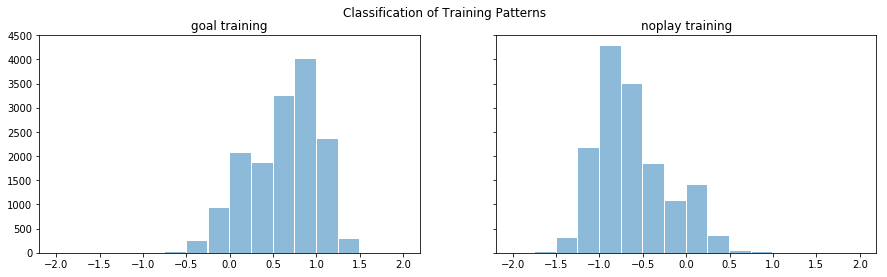

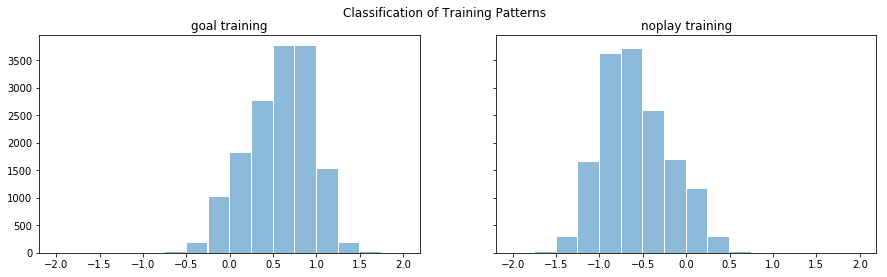

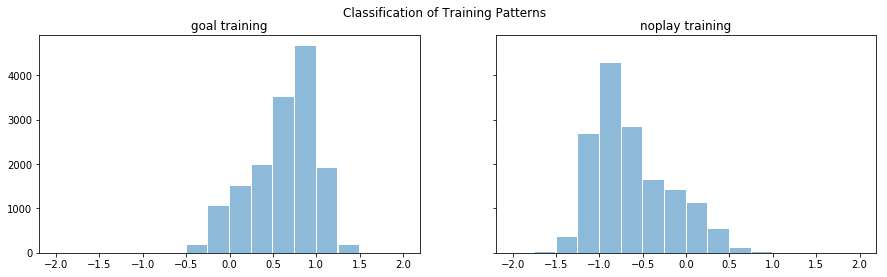

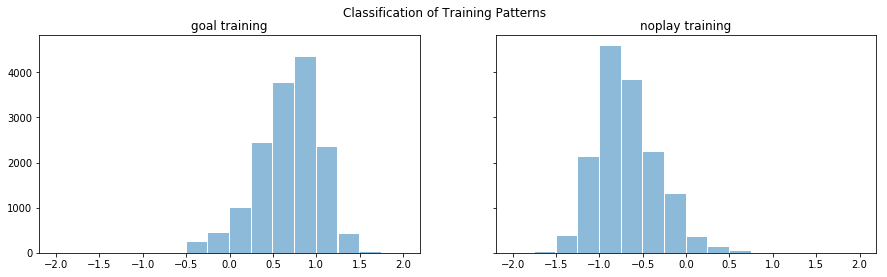

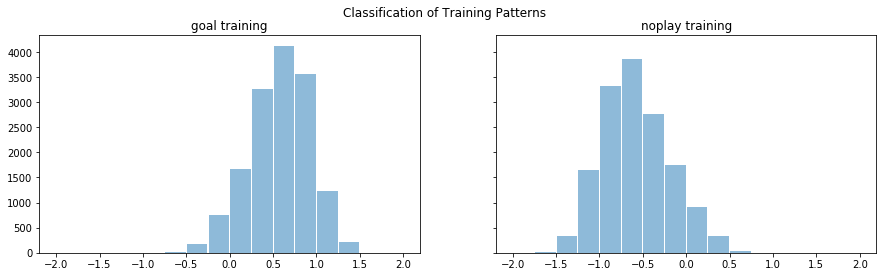

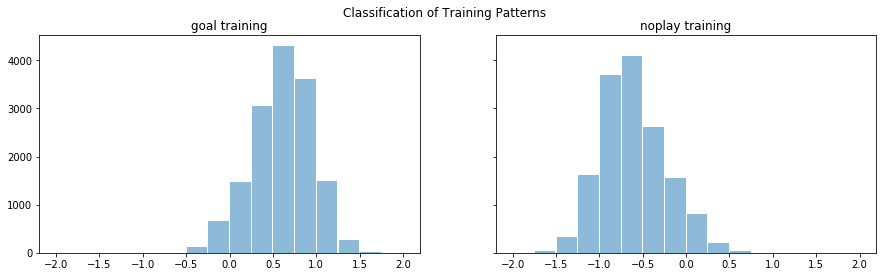

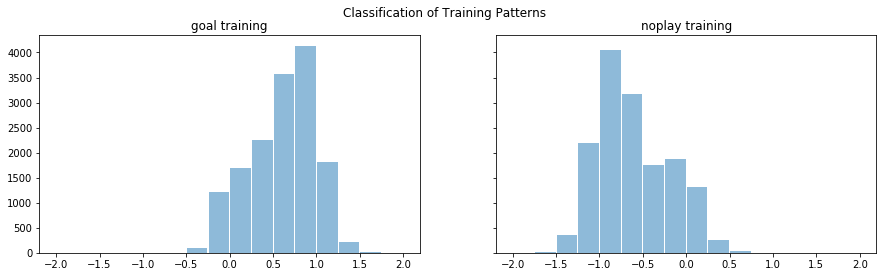

In [4]:
bins=np.arange(-2, 2 + 0.25, 0.25)
for i in range(20):
    exp1 = data3[i::20]

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
    f.suptitle('Classification of Training Patterns')
    ax1.hist((np.hstack(exp1.iloc[87]['output'])), bins=bins, rwidth=0.95, alpha=0.5, label='goal training')
    ax1.set_title('goal training')
    ax2.hist((np.hstack(exp1.iloc[88]['output'])), bins=bins, rwidth=0.95, alpha=0.5, label='noplay training')
    ax2.set_title('noplay training')


# Classify Each TimePoint then apply Median Filter to see Most Common Classification

In [5]:
for i in range(len(data3)):
    for j in range(len(data3.iloc[i]['output'])):
        if np.isclose(data3.iloc[i]['output'][j], 1, atol=0.6):
            data3.iloc[i]['output'][j] = 1
        elif np.isclose(data3.iloc[i]['output'][j], 0, atol=0.3):
            data3.iloc[i]['output'][j] = 0  
        else:
            data3.iloc[i]['output'][j] = -1
data3

,output
pattern,
output_goal_test000,"[[0.0], [0.0], [0.0], [0.0], [0.0], [-1.0], [-..."
output_goal_test000,"[[0.0], [0.0], [0.0], [0.0], [0.0], [-1.0], [-..."
output_goal_test000,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
output_goal_test000,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
output_goal_test000,"[[0.0], [0.0], [-1.0], [-1.0], [-1.0], [-1.0],..."
output_goal_test000,"[[1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1...."
output_goal_test000,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
output_goal_test000,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
output_goal_test000,"[[0.0], [-1.0], [-1.0], [-1.0], [-1.0], [-1.0]..."


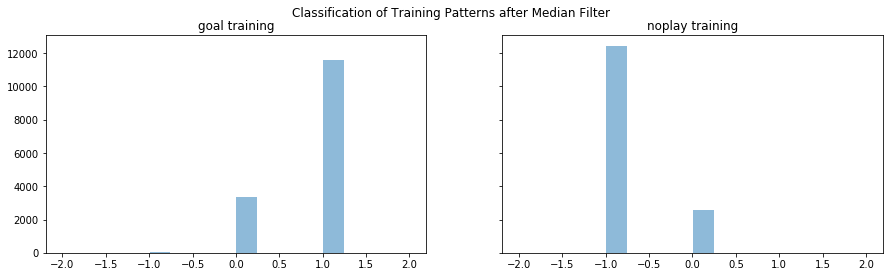

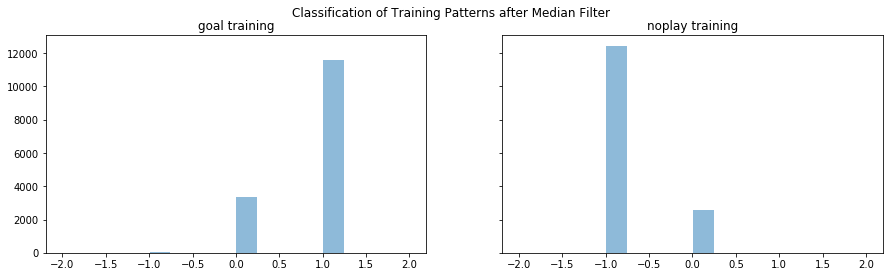

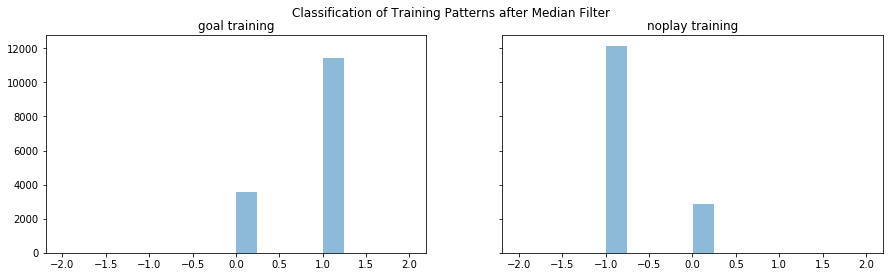

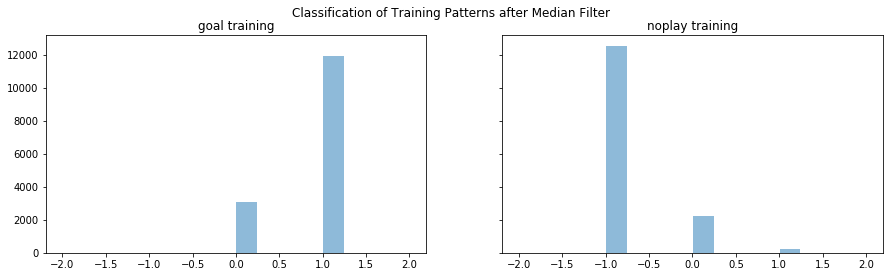

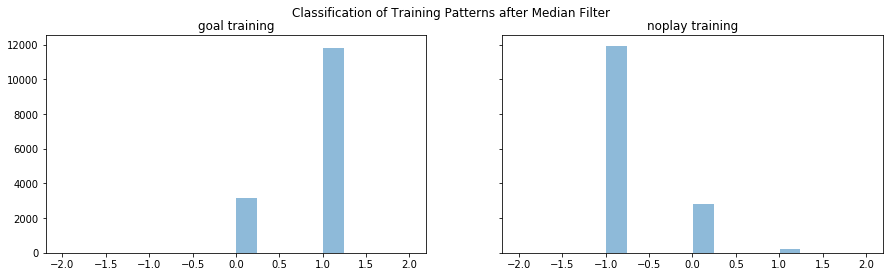

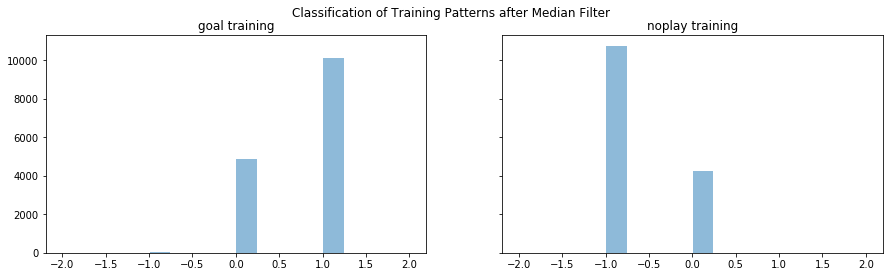

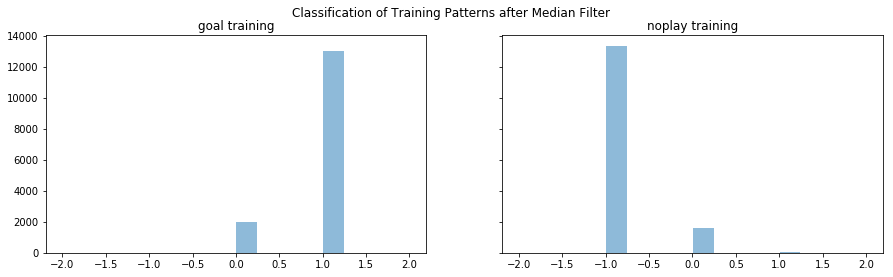

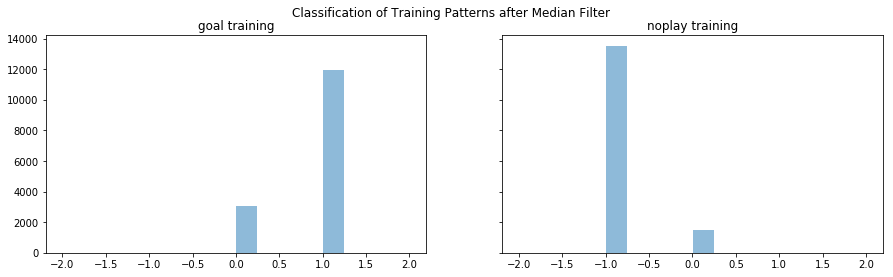

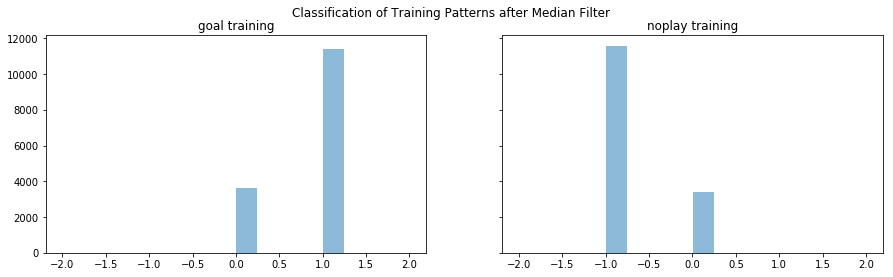

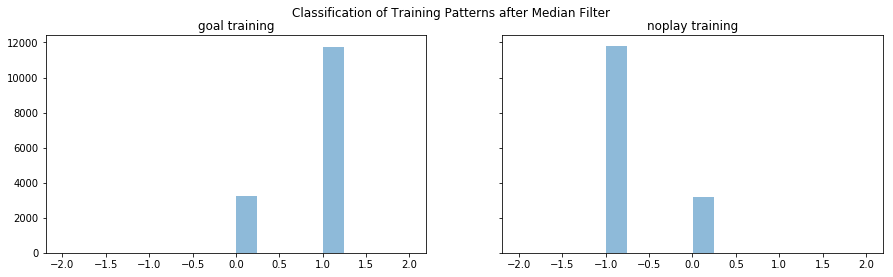

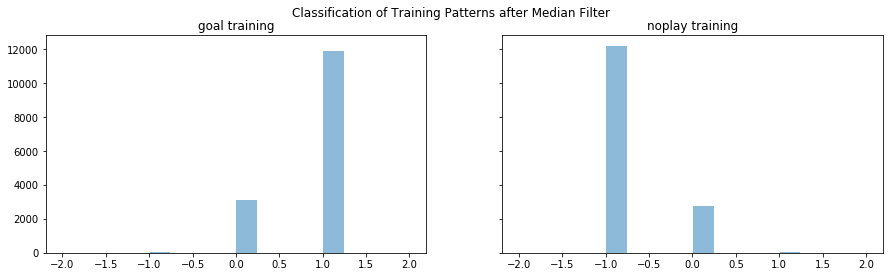

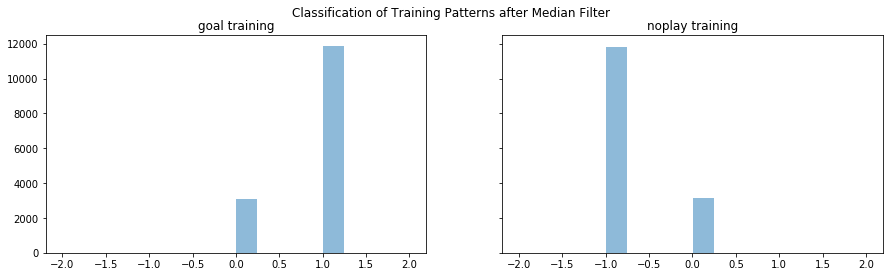

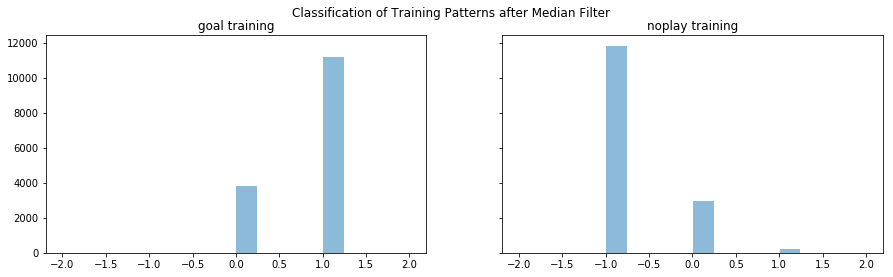

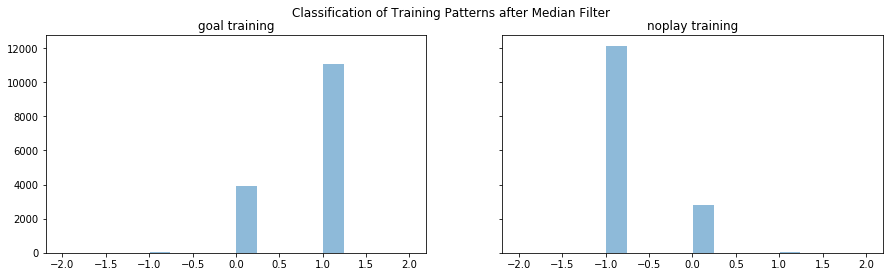

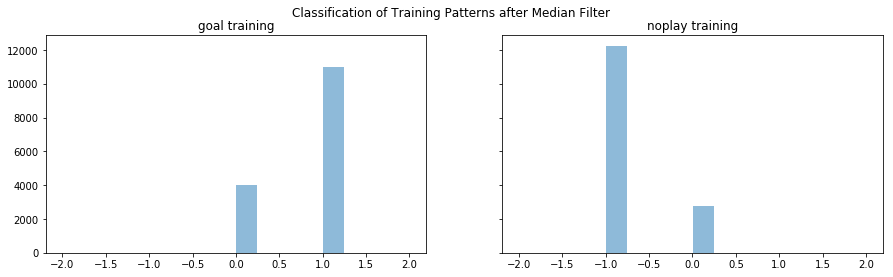

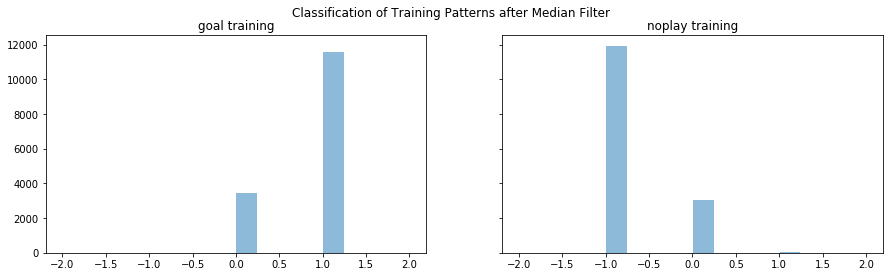

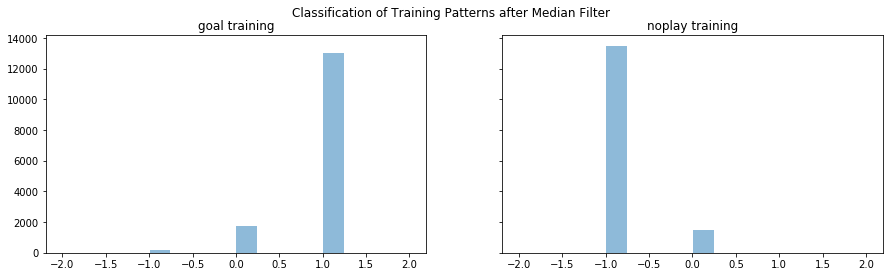

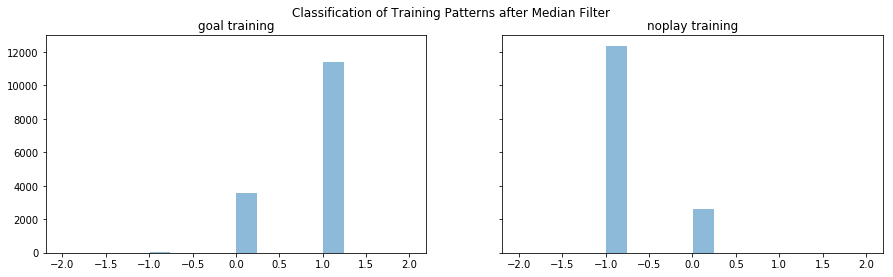

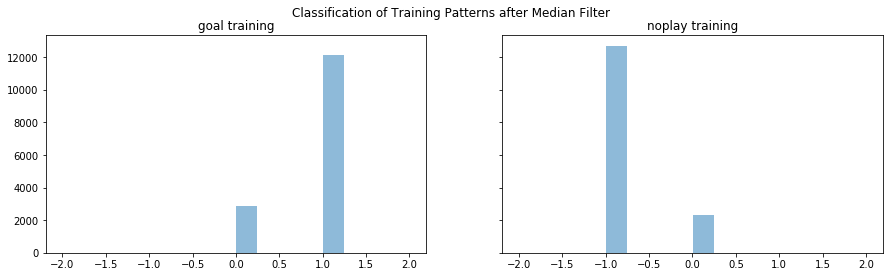

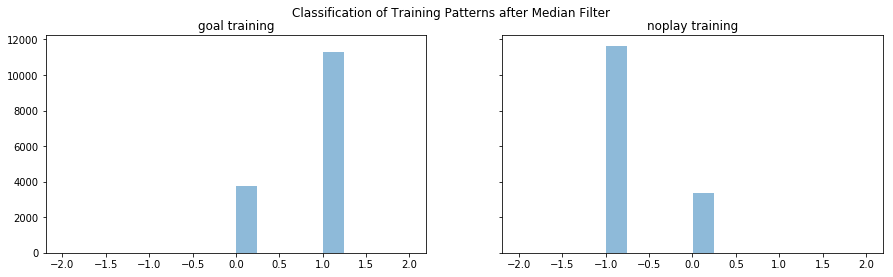

In [6]:
for i in range(20):
    exp1 = data3[i::20]    
    goal_med=spsig.medfilt((np.hstack(exp1.iloc[87]['output'])),99)
    noplay_med=spsig.medfilt((np.hstack(exp1.iloc[88]['output'])),99)

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
    f.suptitle('Classification of Training Patterns after Median Filter')
    ax1.hist(goal_med, bins=bins, rwidth=0.95, alpha=0.5, label='goal training')
    ax1.set_title('goal training')
    ax2.hist(noplay_med, bins=bins, rwidth=0.95, alpha=0.5, label='noplay training')
    ax2.set_title('noplay training')

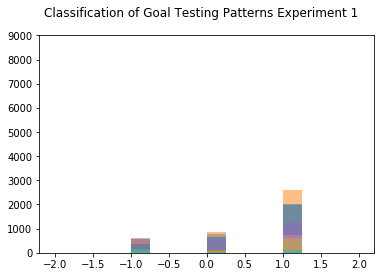

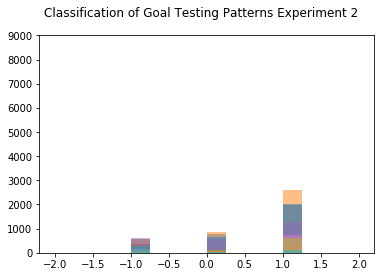

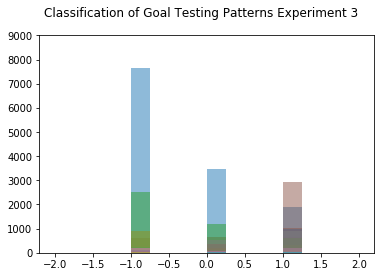

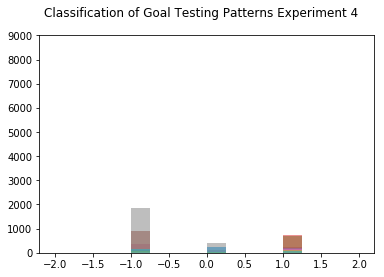

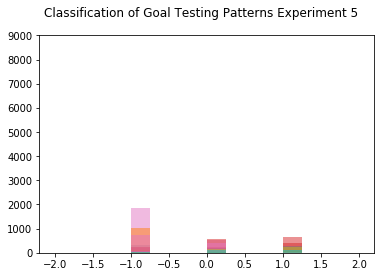

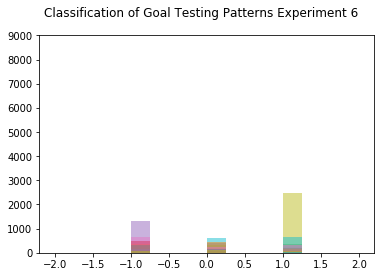

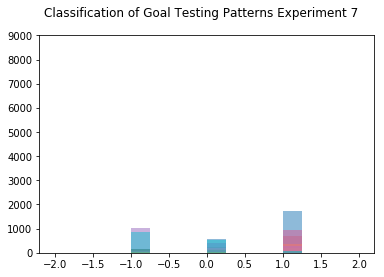

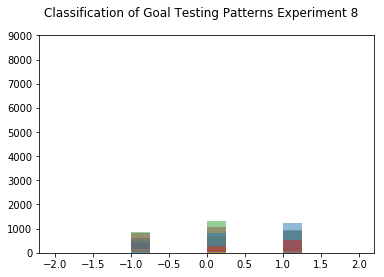

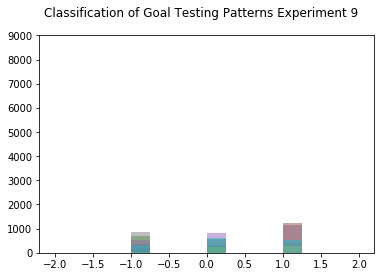

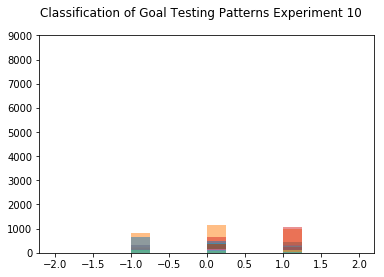

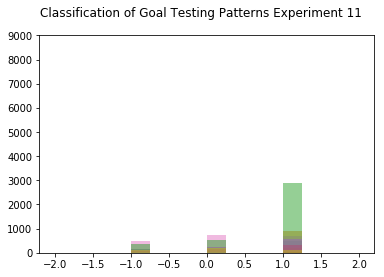

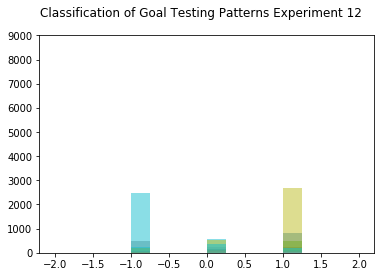

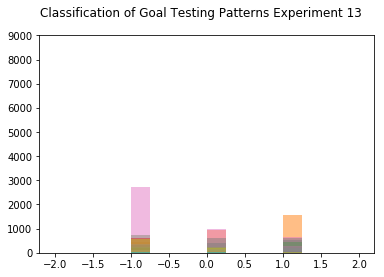

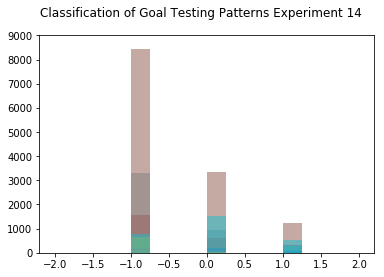

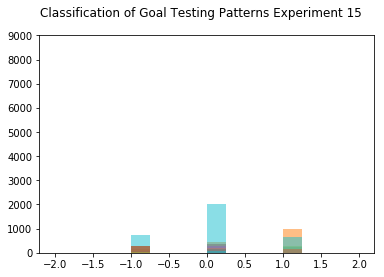

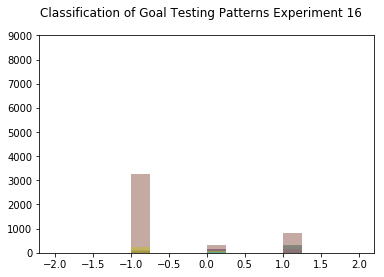

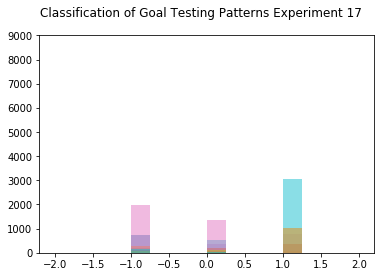

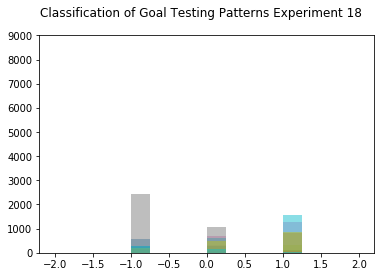

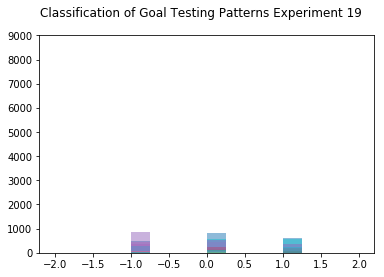

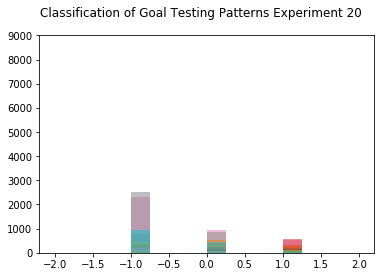

In [7]:
goal_testing=data3.loc['output_goal_test000': 'output_goal_test019']
for i in range(20):
    exp1 = goal_testing[i::20]    
    plt.figure()
    for r in range(len(exp1)):
        b=np.hstack(exp1.iloc[r]['output'])
        a=spsig.medfilt(b,9)
        plt.suptitle('Classification of Goal Testing Patterns Experiment %d' % int(i+1))
        plt.hist(a, bins, alpha = 0.5)
        plt.ylim(0, 9000)
        #plt.plot(a)
        #plt.ylim((-2,2))

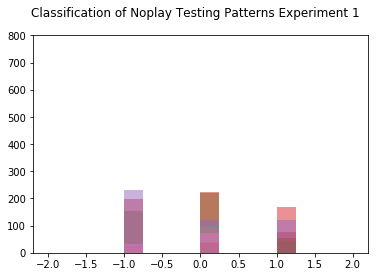

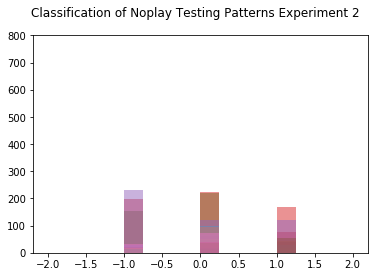

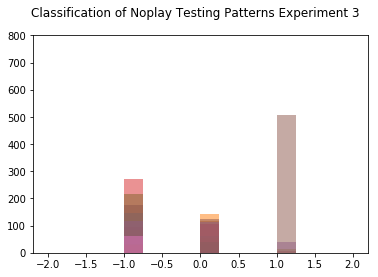

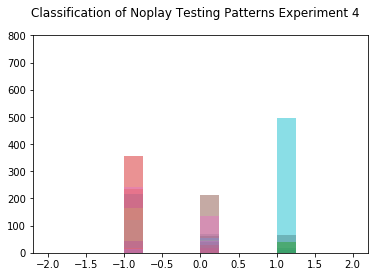

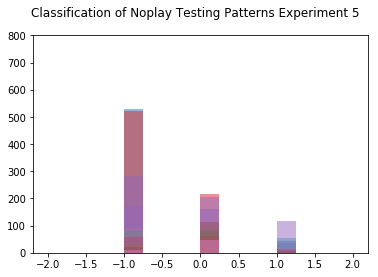

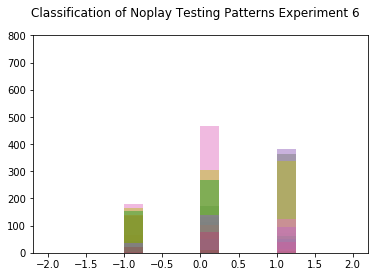

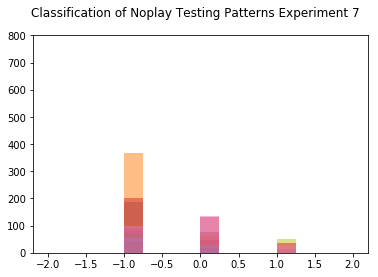

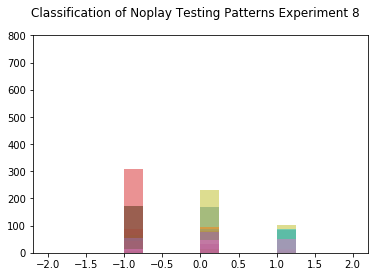

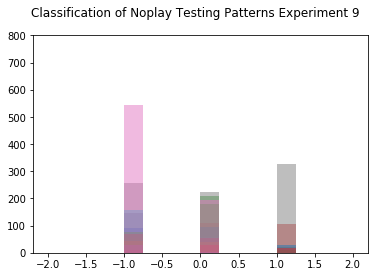

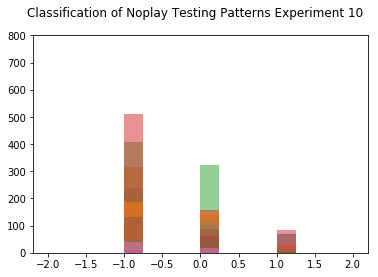

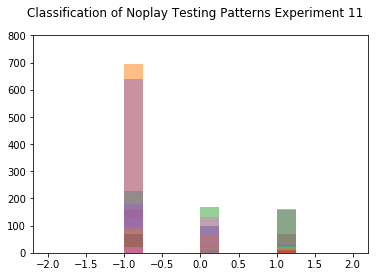

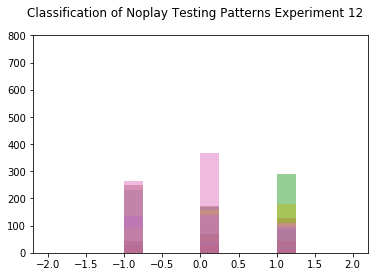

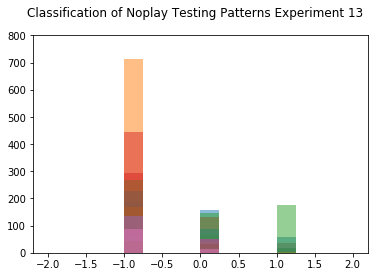

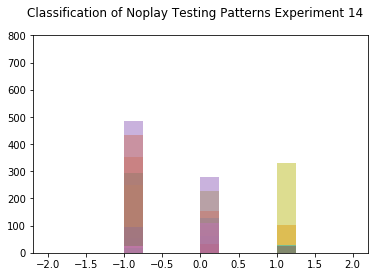

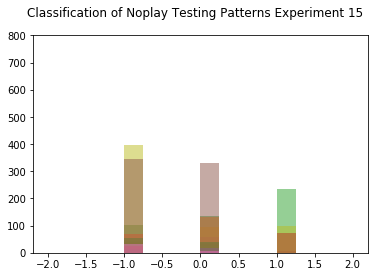

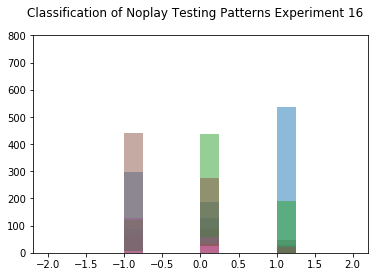

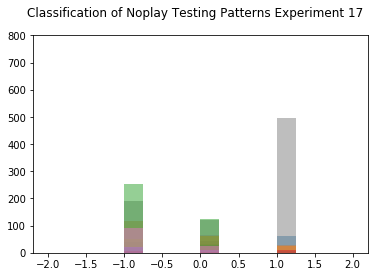

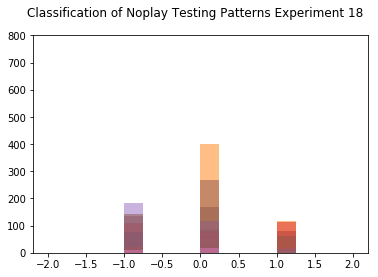

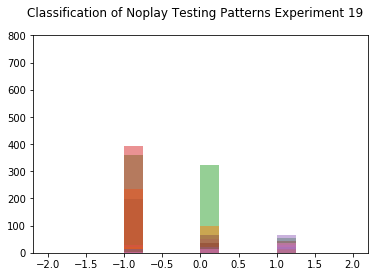

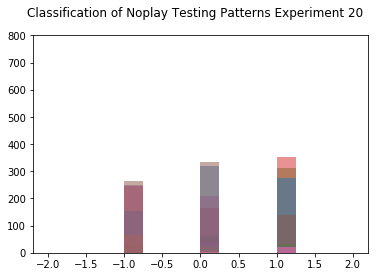

In [8]:
noplay_testing=data3.loc['output_noplay_test000': 'output_noplay_test016']
for i in range(20):
    exp1 = noplay_testing[i::20]    
    plt.figure()
    for r in range(len(exp1)):
        b=np.hstack(exp1.iloc[r]['output'])
        a=spsig.medfilt(b,9)
        plt.suptitle('Classification of Noplay Testing Patterns Experiment %d' % int(i+1))
        plt.hist(a, bins, alpha = 0.5)
        plt.ylim(0, 800)
        #plt.plot(a)
        #plt.ylim((-2,2))

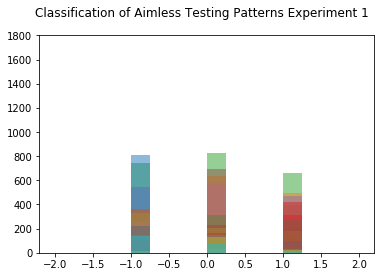

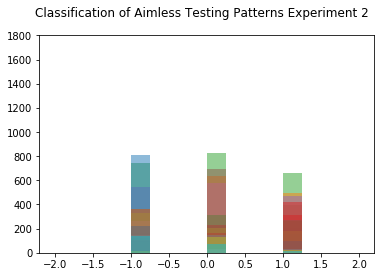

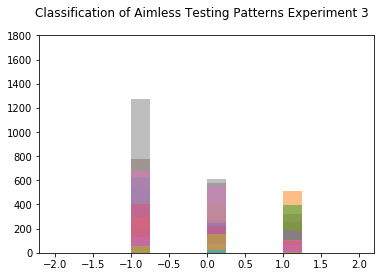

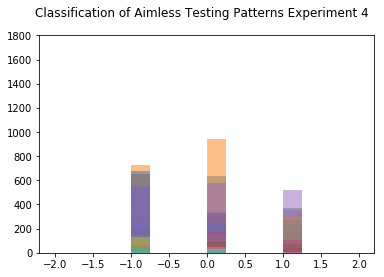

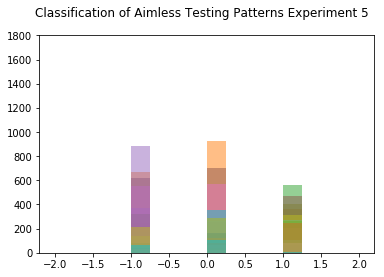

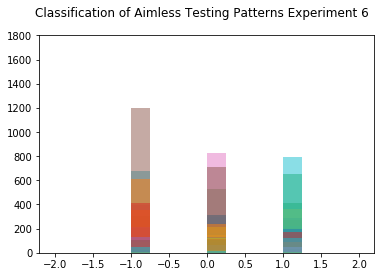

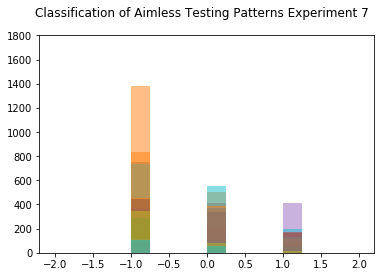

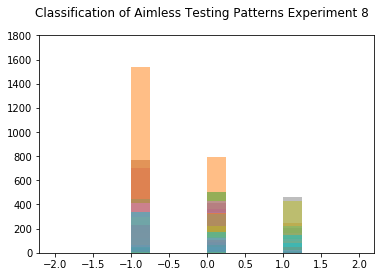

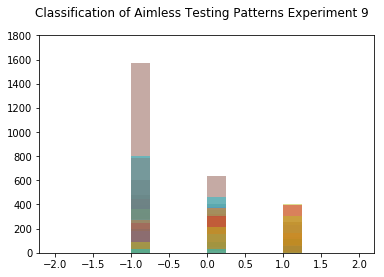

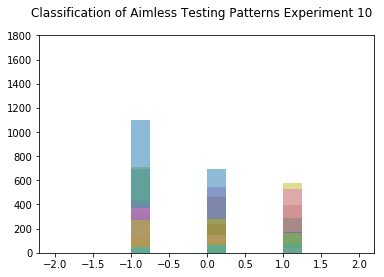

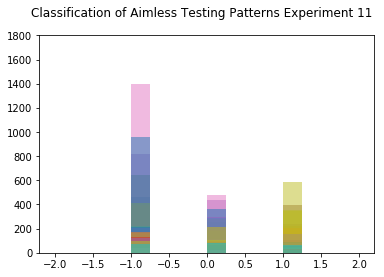

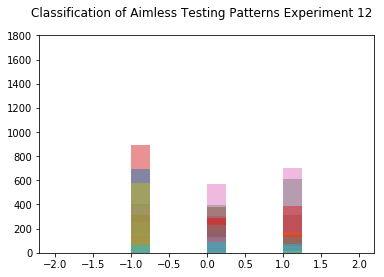

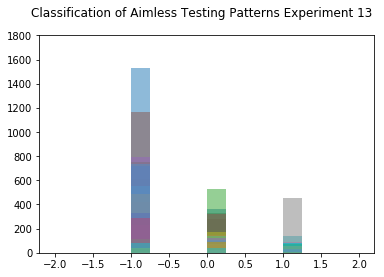

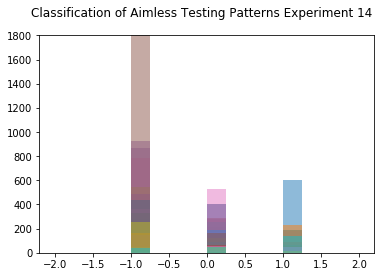

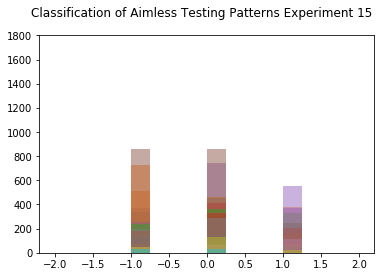

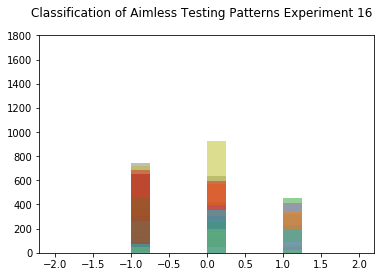

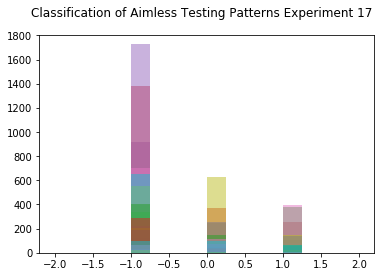

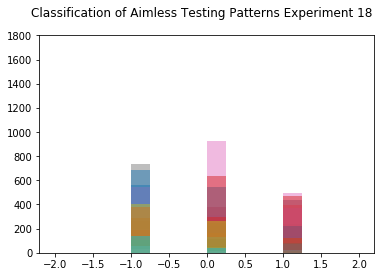

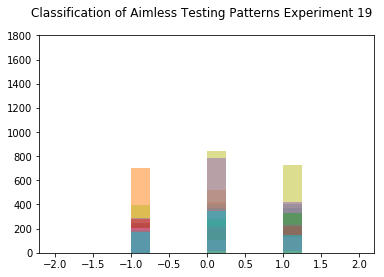

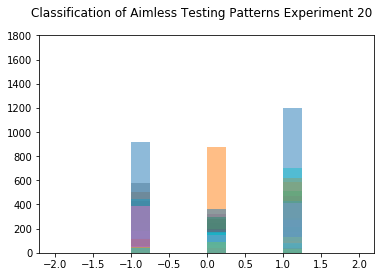

In [9]:
aimless_testing=data3.loc['output_aimless000': 'output_aimless049']
for i in range(20):
    exp1 = aimless_testing[i::20]    
    plt.figure()
    for r in range(len(exp1)):
        b=np.hstack(exp1.iloc[r]['output'])
        a=spsig.medfilt(b,9)
        plt.suptitle('Classification of Aimless Testing Patterns Experiment %d' % int(i+1))
        plt.hist(a, bins, alpha = 0.5)
        plt.ylim(0, 1800)
        #plt.plot(a)
        #plt.ylim((-2,2))

# Classify the Average Output for Each Clip

In [10]:
data = pd.DataFrame(pytry.read('Training_500x3'))
keys_goal_test = [k for k in data.keys() for v in data[k] if k.startswith('output_goal_test')]
keys_noplay_test = [k for k in data.keys() for v in data[k] if k.startswith('output_noplay_test')]
keys_aimless = [k for k in data.keys() for v in data[k] if k.startswith('output_aimless')]
keys_training = ['output_goal_train', 'output_noplay_train']
data2={}
for j in range(20):
    for k in keys_goal_test:
        a=data[k][j]['output']
        data2[k]=pd.Series([a])
    for k in keys_noplay_test:
        a=data[k][j]['output']
        data2[k]=pd.Series([a])
    for k in keys_aimless:
        a=data[k][j]['output']
        data2[k]=pd.Series([a])
    for k in keys_training:
        a=data[k][j+20]['output']
        data2[k]=pd.Series([a])
    if j==0:
        data2=pd.DataFrame(data2)
        data4=data2
    else:
        data2=pd.DataFrame(data2)
        data4=data4.append(data2, ignore_index=True)

keys = [k for k in data4.keys() for v in data4[k]]
values = [v for k in data4.keys() for v in data4[k]]
data4 = pd.DataFrame.from_dict({'pattern':keys, 'output': values})
data4=data4.set_index('pattern')

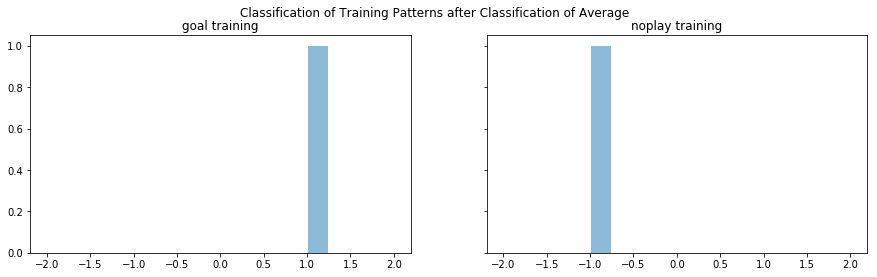

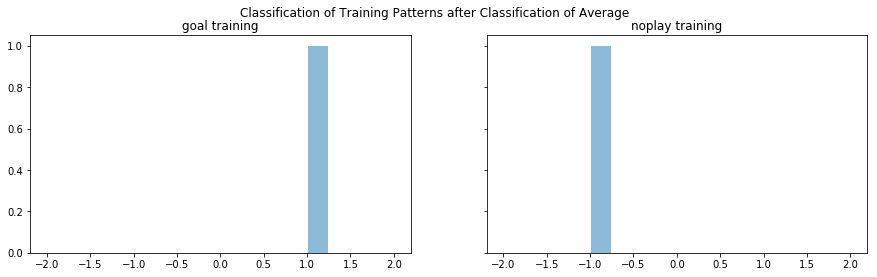

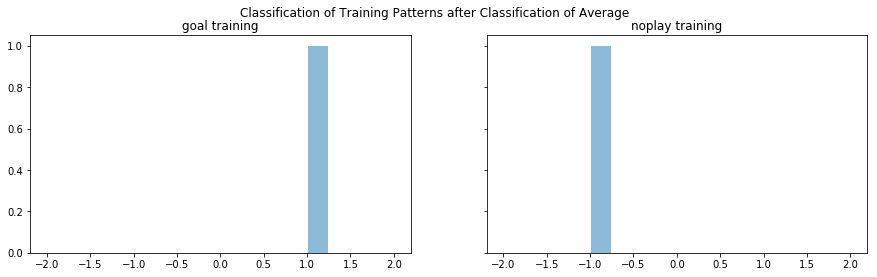

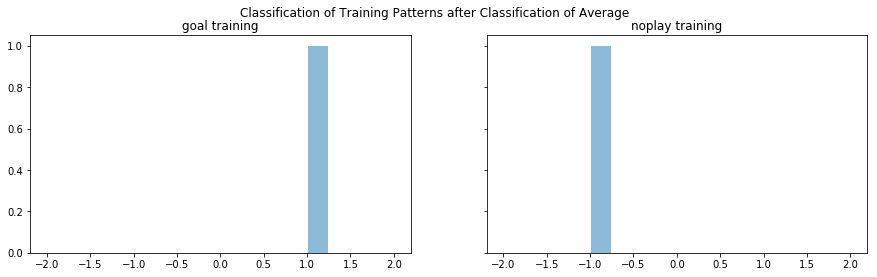

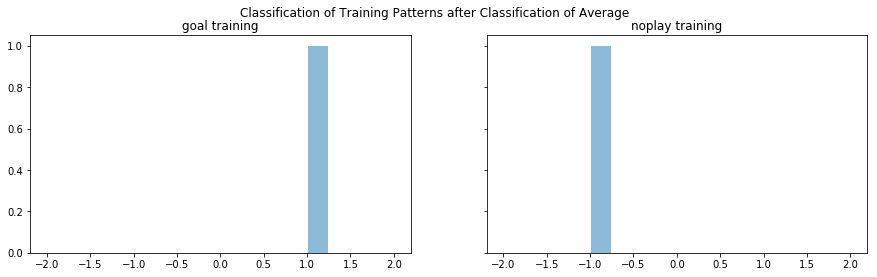

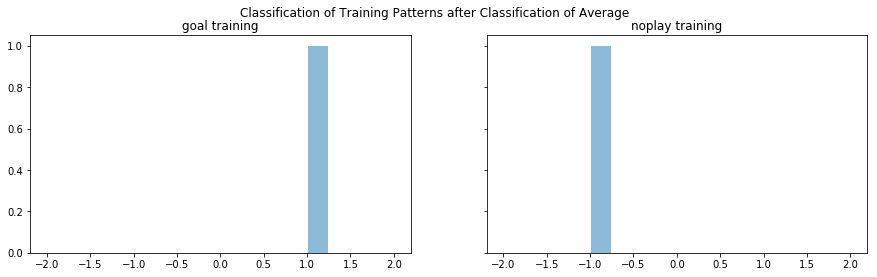

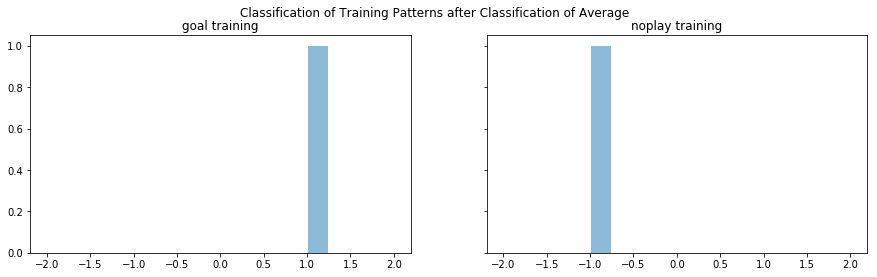

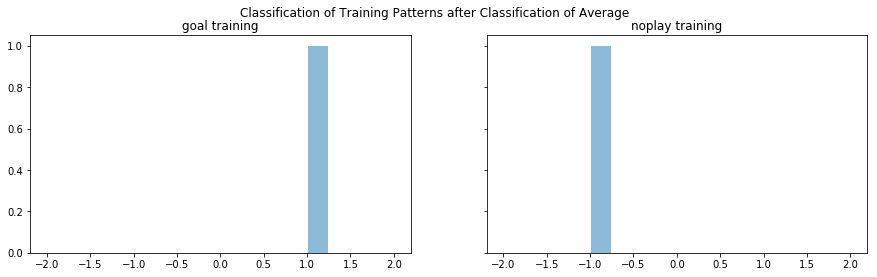

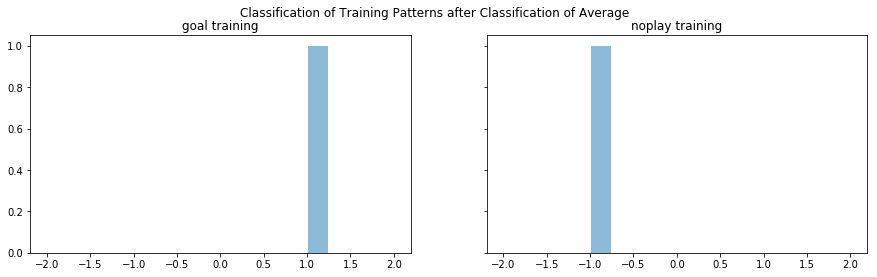

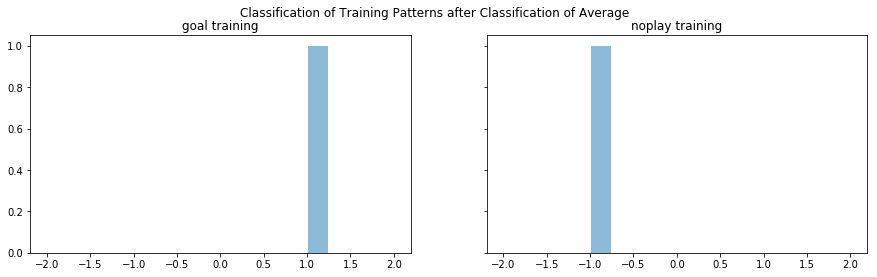

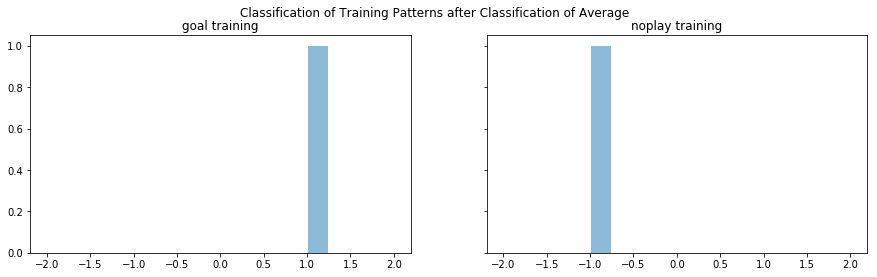

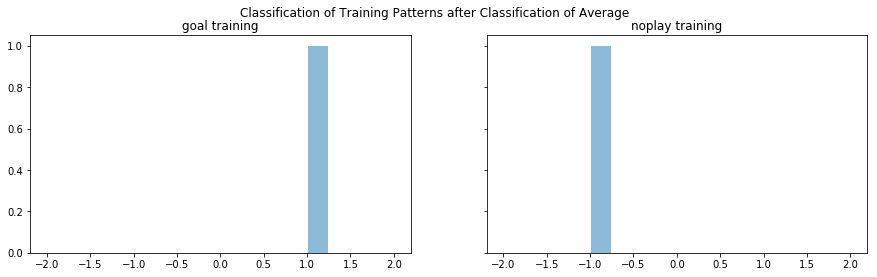

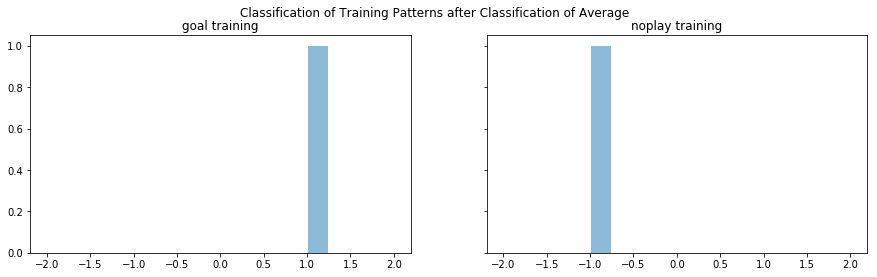

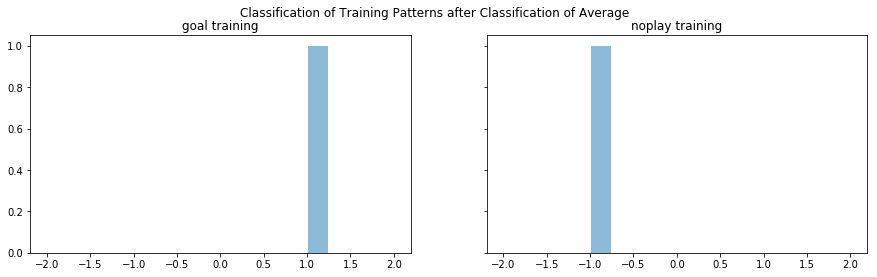

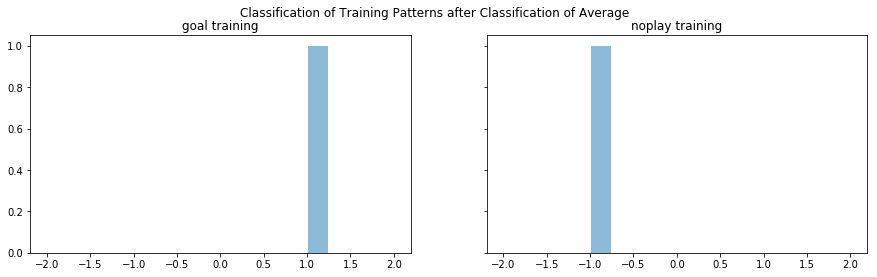

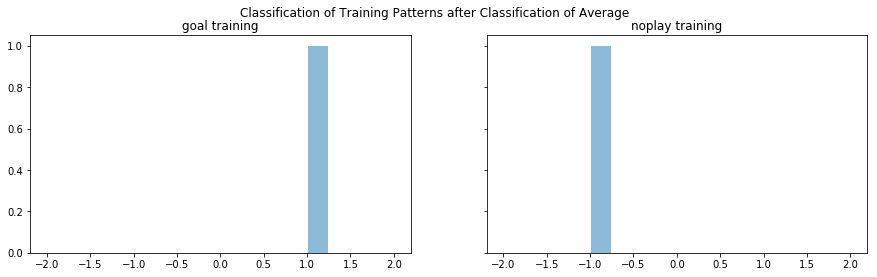

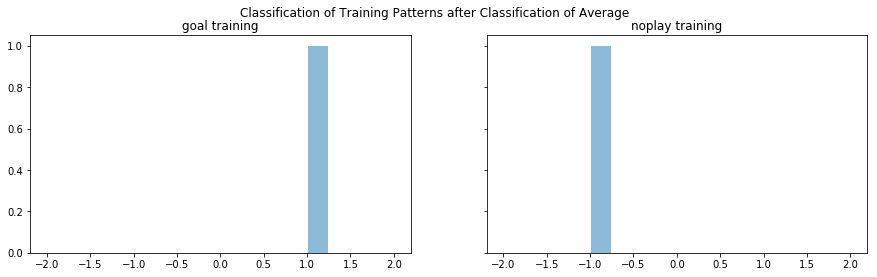

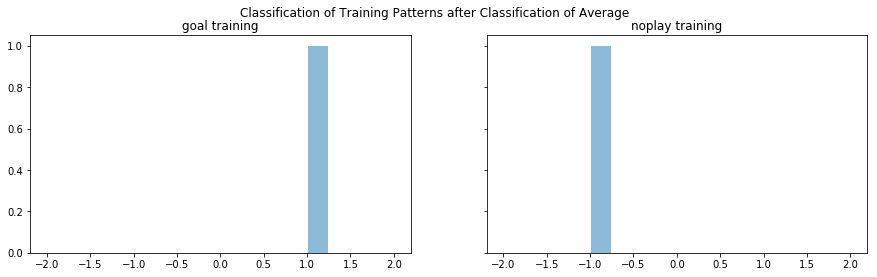

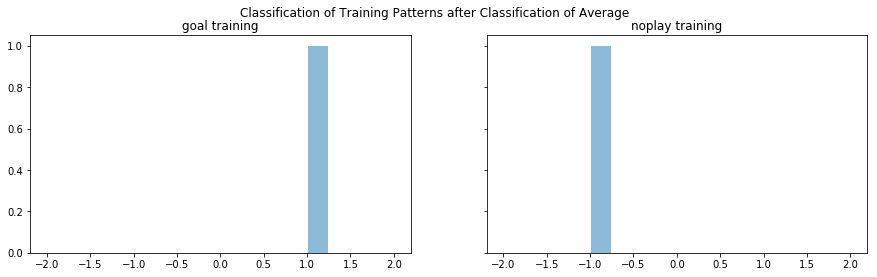

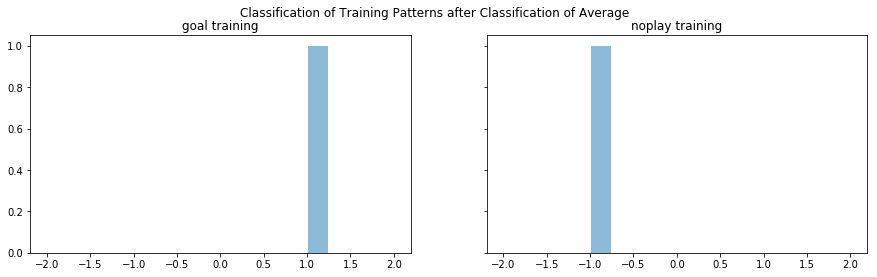

In [11]:
goal_training=data4.loc['output_goal_train']
noplay_training=data4.loc['output_noplay_train']
for r in range(20):
    b=np.hstack([goal_training.iloc[r]['output']])
    b_mean = np.mean(b)
    if np.isclose(b_mean, 1, atol=0.6):
        goal_training.iloc[r]['output'] = 1
    elif np.isclose(b_mean, 0, atol=0.3):
        goal_training.iloc[r]['output'] = 0  
    else:
        goal_training.iloc[r]['output'] = -1
    b=np.hstack([noplay_training.iloc[r]['output']])
    b_mean = np.mean(b)
    if np.isclose(b_mean, 1, atol=0.6):
        noplay_training.iloc[r]['output'] = 1
    elif np.isclose(b_mean, 0, atol=0.3):
        noplay_training.iloc[r]['output'] = 0  
    else:
        noplay_training.iloc[r]['output'] = -1
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
    f.suptitle('Classification of Training Patterns after Classification of Average')
    ax1.hist(goal_training.iloc[r], bins=bins, rwidth=0.95, alpha=0.5, label='goal training')
    ax1.set_title('goal training')
    ax2.hist(noplay_training.iloc[r], bins=bins, rwidth=0.95, alpha=0.5, label='noplay training')
    ax2.set_title('noplay training')

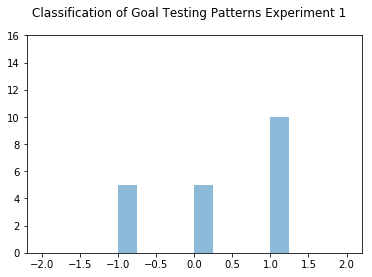

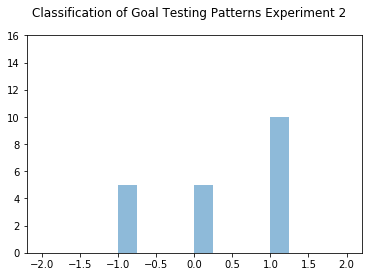

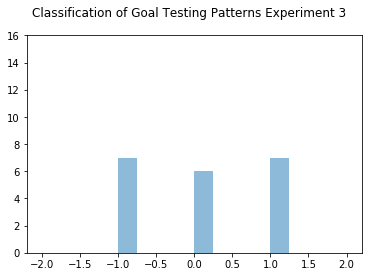

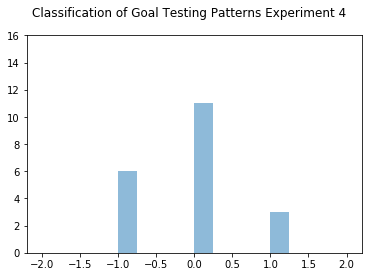

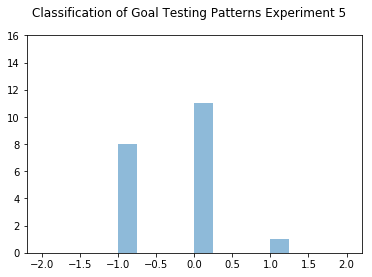

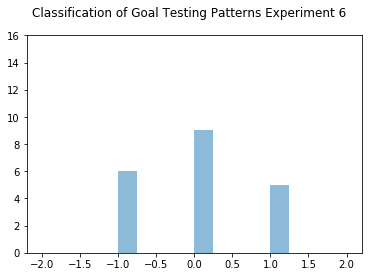

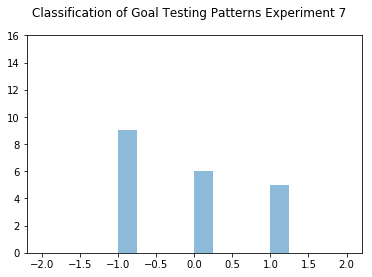

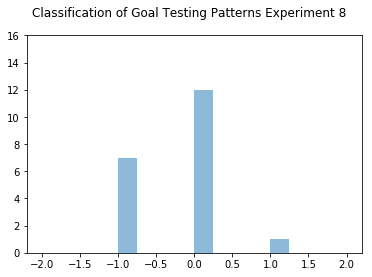

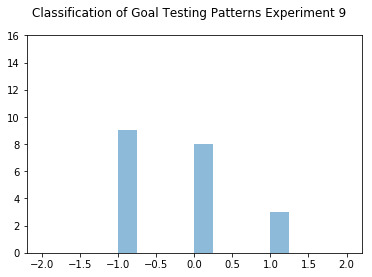

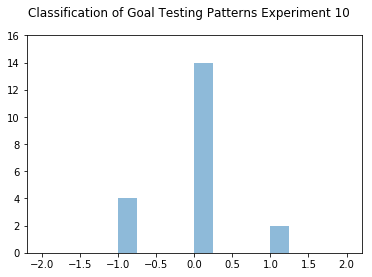

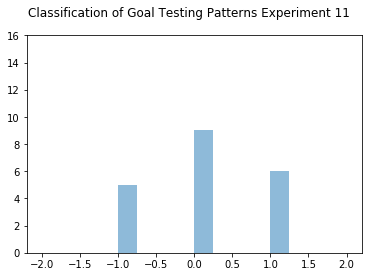

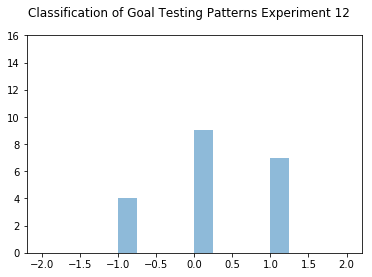

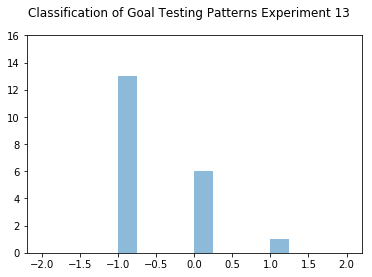

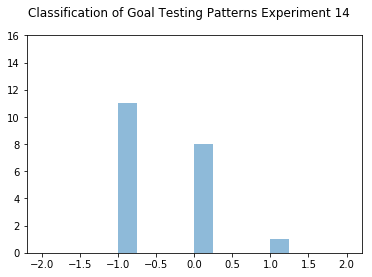

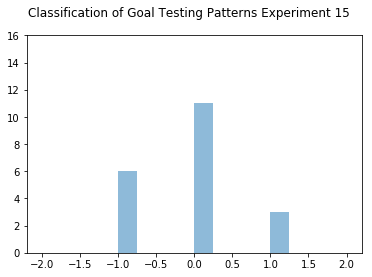

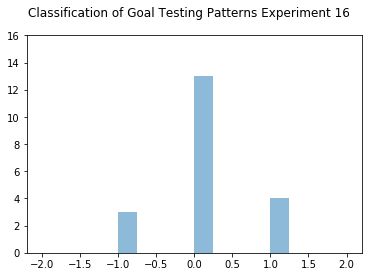

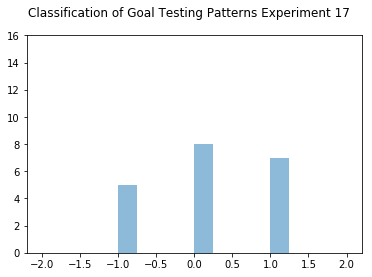

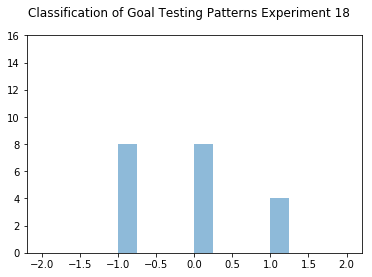

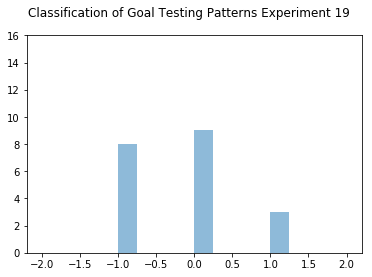

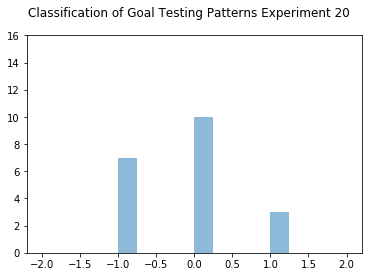

In [12]:
goal_testing=data4.loc['output_goal_test000': 'output_goal_test019']
for i in range(20):
    exp1 = goal_testing[i::20]    
    plt.figure()
    for r in range(len(exp1)):
        b=np.hstack([exp1.iloc[r]['output']])
        b_mean = np.mean(b)
        if np.isclose(b_mean, 1, atol=0.6):
            exp1.iloc[r]['output'] = 1
        elif np.isclose(b_mean, 0, atol=0.3):
            exp1.iloc[r]['output'] = 0  
        else:
            exp1.iloc[r]['output'] = -1
    plt.suptitle('Classification of Goal Testing Patterns Experiment %d' % int(i+1))
    plt.hist(exp1.T, bins, alpha = 0.5)
    plt.ylim(0, 16)
    #plt.plot(a)
    #plt.ylim((-2,2))


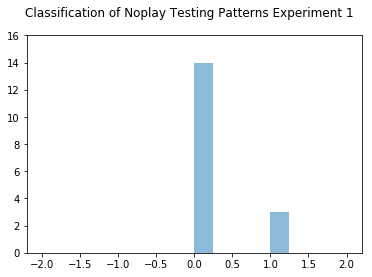

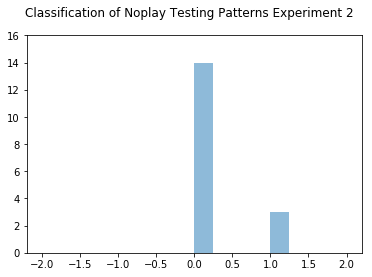

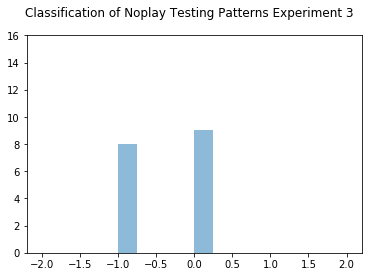

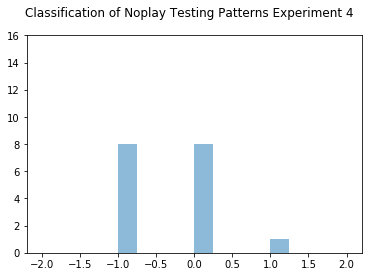

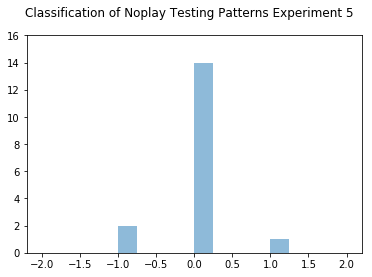

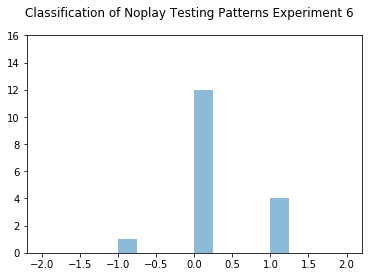

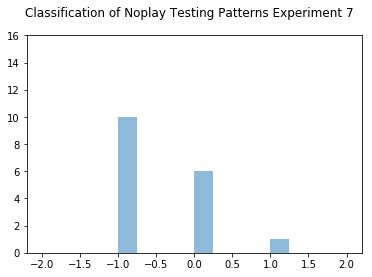

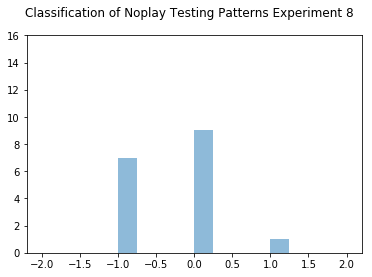

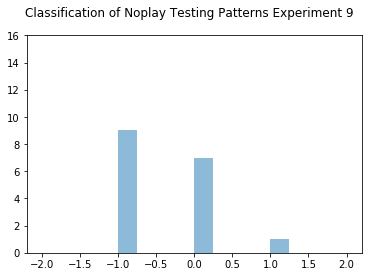

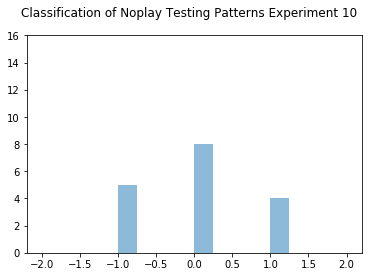

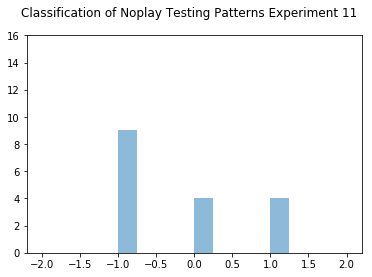

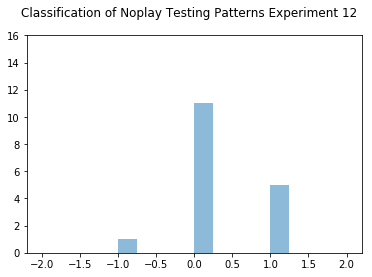

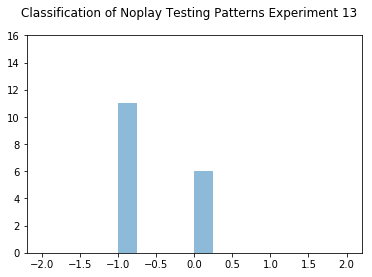

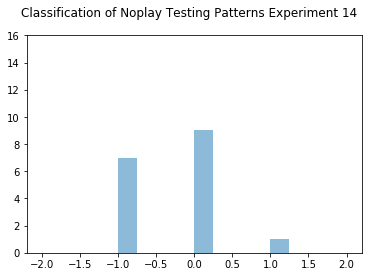

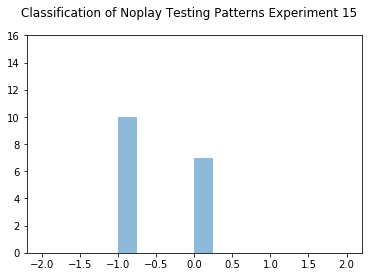

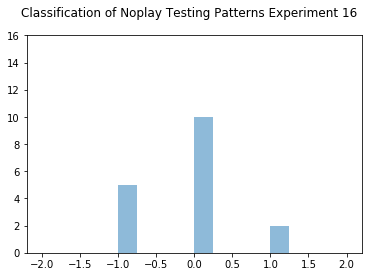

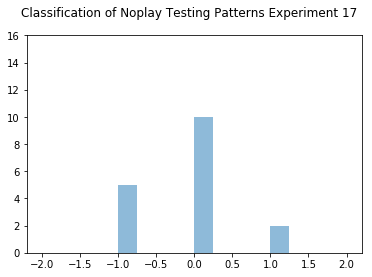

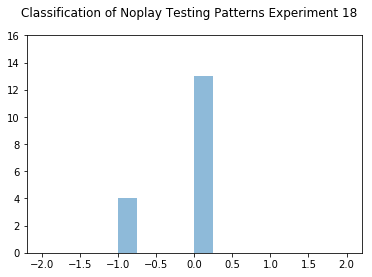

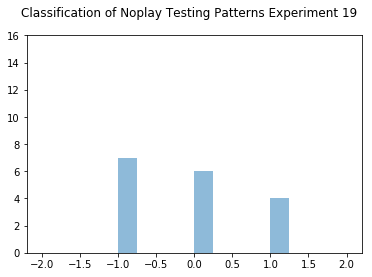

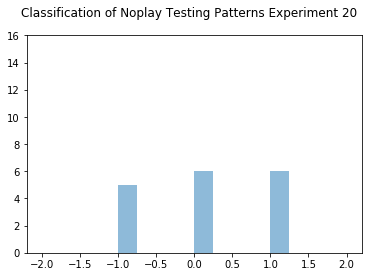

In [13]:
noplay_testing=data4.loc['output_noplay_test000': 'output_noplay_test016']
for i in range(20):
    exp1 = noplay_testing[i::20]    
    plt.figure()
    for r in range(len(exp1)):
        b=np.hstack([exp1.iloc[r]['output']])
        b_mean = np.mean(b)
        if np.isclose(b_mean, 1, atol=0.6):
            exp1.iloc[r]['output'] = 1
        elif np.isclose(b_mean, 0, atol=0.3):
            exp1.iloc[r]['output'] = 0  
        else:
            exp1.iloc[r]['output'] = -1
    plt.suptitle('Classification of Noplay Testing Patterns Experiment %d' % int(i+1))
    plt.hist(exp1.T, bins, alpha = 0.5)
    plt.ylim(0, 16)
    #plt.plot(a)
    #plt.ylim((-2,2))

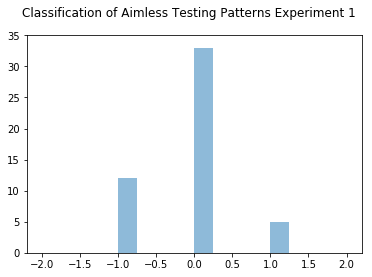

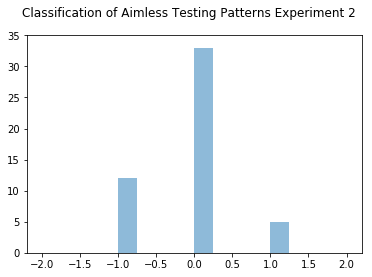

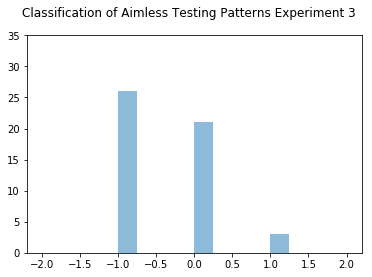

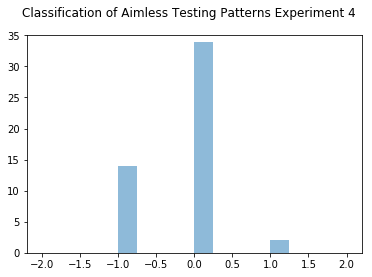

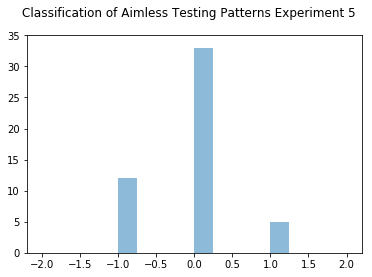

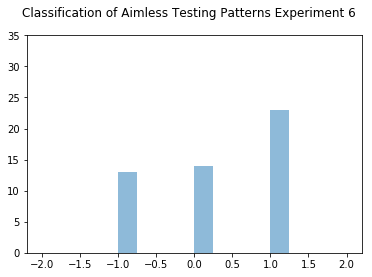

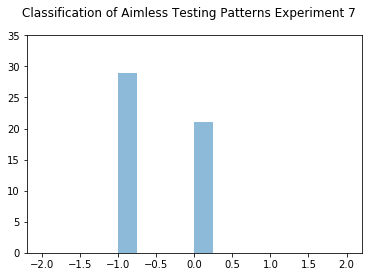

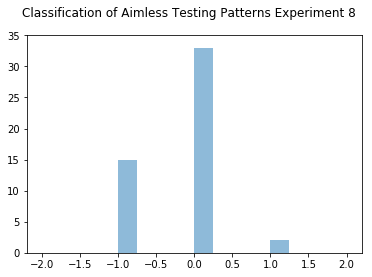

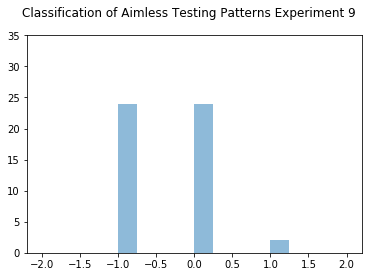

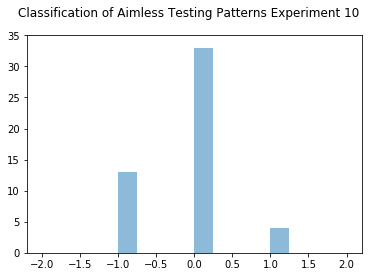

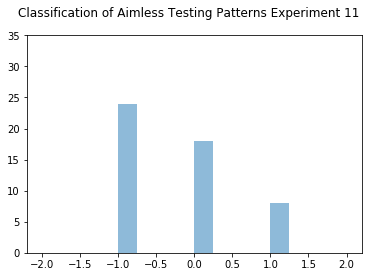

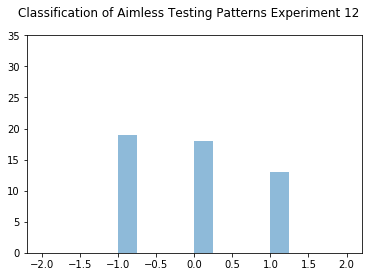

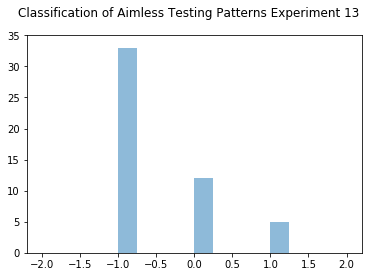

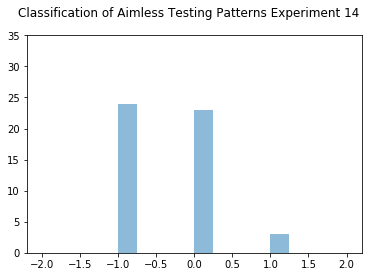

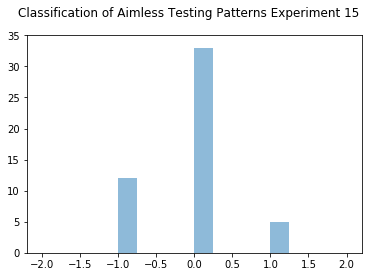

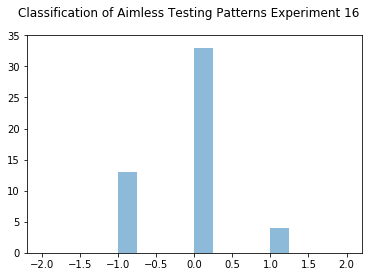

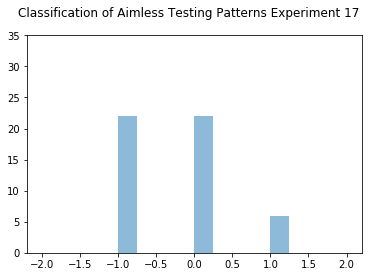

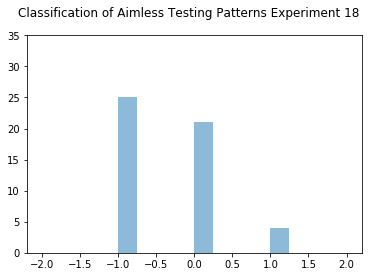

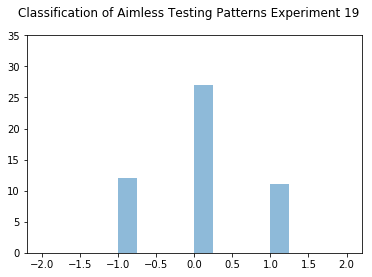

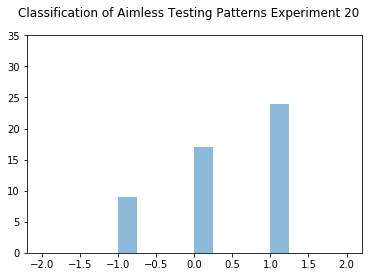

In [14]:
aimless_testing=data4.loc['output_aimless000': 'output_aimless049']
for i in range(20):
    exp1 = aimless_testing[i::20]    
    plt.figure()
    for r in range(len(exp1)):
        b=np.hstack([exp1.iloc[r]['output']])
        b_mean = np.mean(b)
        if np.isclose(b_mean, 1, atol=0.6):
            exp1.iloc[r]['output'] = 1
        elif np.isclose(b_mean, 0, atol=0.3):
            exp1.iloc[r]['output'] = 0  
        else:
            exp1.iloc[r]['output'] = -1
    plt.suptitle('Classification of Aimless Testing Patterns Experiment %d' % int(i+1))
    plt.hist(exp1.T, bins, alpha = 0.5)
    plt.ylim(0, 35)
    #plt.plot(a)
    #plt.ylim((-2,2))